In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from scipy import stats
from pathlib import Path, PureWindowsPath

In [2]:
def extract_dataset_info(data_path):
    # extract information from train.txt
    f = open(os.path.join(data_path, "train.txt"), "r")
    contents_train = f.readlines()
    label_classes, label_train_list, img_train_list = [], [], []
    for sample in contents_train:
        sample = sample.split()
        label, img_path = sample[0], sample[1]
        if label not in label_classes:
            label_classes.append(label)
        label_train_list.append(sample[0])
        img_train_list.append(os.path.join(data_path, Path(PureWindowsPath(img_path))))
    print('Classes: {}'.format(label_classes))

    # extract information from test.txt
    f = open(os.path.join(data_path, "test.txt"), "r")
    contents_test = f.readlines()
    label_test_list, img_test_list = [], []
    for sample in contents_test:
        sample = sample.split()
        label, img_path = sample[0], sample[1]
        label_test_list.append(label)
        img_test_list.append(os.path.join(data_path, Path(PureWindowsPath(img_path))))  # you can directly use img_path if you run in Windows

    return label_classes, label_train_list, img_train_list, label_test_list, img_test_list

In [ ]:
def compute_dsift(img):
    # To do
    return dense_feature

Normalization is incomplete check afterwards.


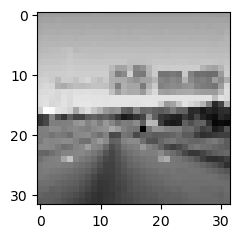

In [32]:
def get_tiny_image(img, output_size):
    # To do
    # img is gray scale image. numpy array.
    # output size will be a tuple of size w,h

    hor_window_size = img.shape[1] // output_size[1]
    vert_window_size = img.shape[0] // output_size[0]
    feature = np.zeros((output_size))
    for row in range(output_size[0]):
        for col in range(output_size[1]):
            feature[row,col] = np.sum(img[row*vert_window_size :(row+1)*vert_window_size-1 , col*hor_window_size : (col+1)*hor_window_size-1])

    feature = feature/(hor_window_size*vert_window_size)
    # Normalize the image.

    # feature = (feature - np.mean(feature)) / np.std(feature)
    feature = (feature - np.mean(feature)) / np.max(feature)
    feature = (feature - np.mean(feature)) / 255
    print("Normalization is incomplete check afterwards.")

    return feature

img = cv2.imread("image_0043.jpg",0)
# plt.imshow(img, cmap='grey')
output_size = (32,32)
tiny_image = get_tiny_image(img, output_size)
fig = plt.figure(figsize=(2.5,2.5))
plt.imshow(tiny_image, cmap='grey')

In [ ]:
def predict_knn(feature_train, label_train, feature_test, k):
    # To do

    # Initialize kNN.
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(feature_train,label_train)

    dist, indices = neigh.kneighbors(feature_test)
    label_test_pred = label_train[indices]
    
    return label_test_pred

In [ ]:
def classify_knn_tiny(label_classes, label_train_list, img_train_list, label_test_list, img_test_list):
    # To do
    visualize_confusion_matrix(confusion, accuracy, label_classes)
    return confusion, accuracy

In [ ]:
def build_visual_dictionary(dense_feature_list, dict_size):
    # To do
    return vocab

In [ ]:
def compute_bow(feature, vocab):
    # To do
    return bow_feature

In [ ]:
def classify_knn_bow(label_classes, label_train_list, img_train_list, label_test_list, img_test_list):
    # To do
    visualize_confusion_matrix(confusion, accuracy, label_classes)
    return confusion, accuracy

In [ ]:
def predict_svm(feature_train, label_train, feature_test, n_classes):
    # To do
    return label_test_pred

In [ ]:
def classify_svm_bow(label_classes, label_train_list, img_train_list, label_test_list, img_test_list):
    # To do
    visualize_confusion_matrix(confusion, accuracy, label_classes)
    return confusion, accuracy

In [ ]:
def visualize_confusion_matrix(confusion, accuracy, label_classes):
    plt.title("accuracy = {:.3f}".format(accuracy))
    plt.imshow(confusion)
    ax, fig = plt.gca(), plt.gcf()
    plt.xticks(np.arange(len(label_classes)), label_classes)
    plt.yticks(np.arange(len(label_classes)), label_classes)
    # set horizontal alignment mode (left, right or center) and rotation mode(anchor or default)
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="center", rotation_mode="default")
    # avoid top and bottom part of heatmap been cut
    ax.set_xticks(np.arange(len(label_classes) + 1) - .5, minor=True)
    ax.set_yticks(np.arange(len(label_classes) + 1) - .5, minor=True)
    ax.tick_params(which="minor", bottom=False, left=False)
    fig.tight_layout()
    plt.show()

In [3]:
if __name__ == '__main__':
    # To do: replace with your dataset path
    label_classes, label_train_list, img_train_list, label_test_list, img_test_list = extract_dataset_info("./scene_classification_data")
    
    # classify_knn_tiny(label_classes, label_train_list, img_train_list, label_test_list, img_test_list)

    # classify_knn_bow(label_classes, label_train_list, img_train_list, label_test_list, img_test_list)
    
    # classify_svm_bow(label_classes, label_train_list, img_train_list, label_test_list, img_test_list)

Classes: ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office', 'Industrial', 'Suburb', 'InsideCity', 'TallBuilding', 'Street', 'Highway', 'OpenCountry', 'Coast', 'Mountain', 'Forest']


In [11]:
print(len(label_classes))
type(label_classes)

15


list

In [12]:
print(len(label_train_list))
type(label_train_list)

1500


list